<a href="https://colab.research.google.com/github/Lukyord/Speech-Recognition-using-Voice/blob/main/emoitonRecognitionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ============================= RAVDESS =============================

Ravdess = '/content/drive/MyDrive/sensor system/datasets/RAVDESS Emotional speech audio'
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/sensor system/datasets/...
1,happy,/content/drive/MyDrive/sensor system/datasets/...
2,happy,/content/drive/MyDrive/sensor system/datasets/...
3,calm,/content/drive/MyDrive/sensor system/datasets/...
4,calm,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
Ravdess_df = Ravdess_df.drop(Ravdess_df[Ravdess_df.Emotions == 'surprise'].index)
Ravdess_df = Ravdess_df.drop(Ravdess_df[Ravdess_df.Emotions == 'calm'].index)

In [ ]:
Ravdess_df['Emotions'].value_counts()

happy       192
calm        192
angry       192
fear        192
disgust     192
sad         192
surprise    192
neutral      96
Name: Emotions, dtype: int64

In [ ]:
# ============================= EmoV-DB Sorted =============================

EmoV = '/content/drive/MyDrive/sensor system/datasets/EmoV-DB'

EmoV_directory_list = os.listdir(EmoV)

file_emotion = []
file_path = []

for actor in EmoV_directory_list:
  emotions_dirlist = os.listdir(EmoV + '/' + actor)
  for emotions in emotions_dirlist:
    files = os.listdir(EmoV + '/' + actor + '/' + emotions)
    if emotions == 'Neutral':
      for file in files:
        file_path.append(EmoV + '/' + actor + '/' + emotions + '/' + file)

for x in range(len(file_path)):
  file_emotion.append('neutral')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

EmoV_df = pd.concat([emotion_df, path_df], axis=1)
EmoV_df

,Emotions,Path
0,neutral,/content/drive/MyDrive/sensor system/datasets/...
1,neutral,/content/drive/MyDrive/sensor system/datasets/...
2,neutral,/content/drive/MyDrive/sensor system/datasets/...
3,neutral,/content/drive/MyDrive/sensor system/datasets/...
4,neutral,/content/drive/MyDrive/sensor system/datasets/...
...,...,...
1563,neutral,/content/drive/MyDrive/sensor system/datasets/...
1564,neutral,/content/drive/MyDrive/sensor system/datasets/...
1565,neutral,/content/drive/MyDrive/sensor system/datasets/...
1566,neutral,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
# ============================= TESS =============================

paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/sensor system/datasets/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
## Create a TESS dataframe
Tess_df = pd.DataFrame()
Tess_df['Path'] = paths
Tess_df['Emotions'] = labels
Tess_df.head()

,Path,Emotions
0,/content/drive/MyDrive/sensor system/datasets/...,disgust
1,/content/drive/MyDrive/sensor system/datasets/...,disgust
2,/content/drive/MyDrive/sensor system/datasets/...,disgust
3,/content/drive/MyDrive/sensor system/datasets/...,disgust
4,/content/drive/MyDrive/sensor system/datasets/...,disgust


In [ ]:
Tess_df = Tess_df.drop(Tess_df[Tess_df.Emotions == 'ps'].index)

In [ ]:
Tess_df['Emotions'].unique()
Tess_df['Emotions'].value_counts()

disgust    400
angry      400
sad        400
ps         400
fear       400
happy      400
neutral    400
Name: Emotions, dtype: int64

In [ ]:
# ============================= CREMA =============================
Crema = '/content/drive/MyDrive/sensor system/datasets/AudioWAV'

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + '/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/sensor system/datasets/...
1,angry,/content/drive/MyDrive/sensor system/datasets/...
2,disgust,/content/drive/MyDrive/sensor system/datasets/...
3,angry,/content/drive/MyDrive/sensor system/datasets/...
4,neutral,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
Crema_df['Emotions'].unique()
Crema_df['Emotions'].value_counts()

fear       1271
angry      1271
disgust    1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64

In [ ]:
# ============================= SAVEE =============================

Savee = '/content/drive/MyDrive/sensor system/datasets/ALL'

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + '/' + file)
    part = file.split('_')[1]
    ele = part[:-2]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df

,Emotions,Path
0,surprise,/content/drive/MyDrive/sensor system/datasets/...
1,surprise,/content/drive/MyDrive/sensor system/datasets/...
2,surprise,/content/drive/MyDrive/sensor system/datasets/...
3,surprise,/content/drive/MyDrive/sensor system/datasets/...
4,surprise,/content/drive/MyDrive/sensor system/datasets/...
...,...,...
475,surprise,/content/drive/MyDrive/sensor system/datasets/...
476,surprise,/content/drive/MyDrive/sensor system/datasets/...
477,surprise,/content/drive/MyDrive/sensor system/datasets/...
478,surprise,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
Savee_df['Emotions'].unique()

array(['surprise'], dtype=object)

## Create and Inspect Dataframe

In [ ]:
# creating Dataframe using all dataframes we created so far.
df = pd.concat([Ravdess_df, Tess_df, Crema_df, Savee_df, EmoV_df], axis = 0)
df

,Emotions,Path
0,neutral,/content/drive/MyDrive/sensor system/datasets/...
1,happy,/content/drive/MyDrive/sensor system/datasets/...
2,happy,/content/drive/MyDrive/sensor system/datasets/...
3,calm,/content/drive/MyDrive/sensor system/datasets/...
4,calm,/content/drive/MyDrive/sensor system/datasets/...
...,...,...
1563,neutral,/content/drive/MyDrive/sensor system/datasets/...
1564,neutral,/content/drive/MyDrive/sensor system/datasets/...
1565,neutral,/content/drive/MyDrive/sensor system/datasets/...
1566,neutral,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
df['Emotions'].value_counts()

neutral     3151
happy       1863
angry       1863
fear        1863
disgust     1863
sad         1863
surprise     672
ps           400
calm         192
Name: Emotions, dtype: int64




## Load CSV Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sensor system/datasets/dataFrame.csv')
df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/sensor system/datasets/...
1,positive,/content/drive/MyDrive/sensor system/datasets/...
2,positive,/content/drive/MyDrive/sensor system/datasets/...
3,neutral,/content/drive/MyDrive/sensor system/datasets/...
4,neutral,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
df['Emotions'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

## Three Emotions Output

In [ ]:
df.Emotions.replace({'neutral':'neutral', 'calm':'neutral', 'happy':'positive', 'sad':'negative', 'angry':'negative', 'fear':'negative', 'disgust':'negative', 'surprise':'positive', 'ps':'positive'}, inplace=True)
df

,Emotions,Path
0,neutral,/content/drive/MyDrive/sensor system/datasets/...
1,positive,/content/drive/MyDrive/sensor system/datasets/...
2,positive,/content/drive/MyDrive/sensor system/datasets/...
3,neutral,/content/drive/MyDrive/sensor system/datasets/...
4,neutral,/content/drive/MyDrive/sensor system/datasets/...
...,...,...
12157,neutral,/content/drive/MyDrive/sensor system/datasets/...
12158,negative,/content/drive/MyDrive/sensor system/datasets/...
12159,negative,/content/drive/MyDrive/sensor system/datasets/...
12160,positive,/content/drive/MyDrive/sensor system/datasets/...


In [ ]:
df['Emotions'].value_counts()

negative    7452
neutral     3343
positive    2935
Name: Emotions, dtype: int64

In [ ]:
df.to_csv("dataFrame2.csv",index=False)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Emotions', ylabel='count'>

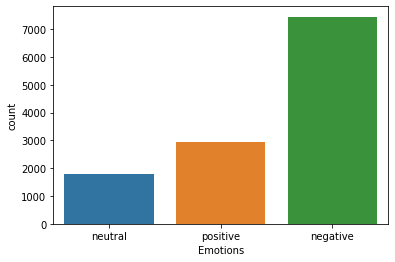

In [ ]:
sns.countplot(df['Emotions'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

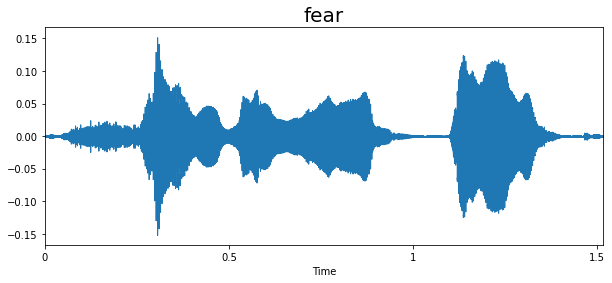

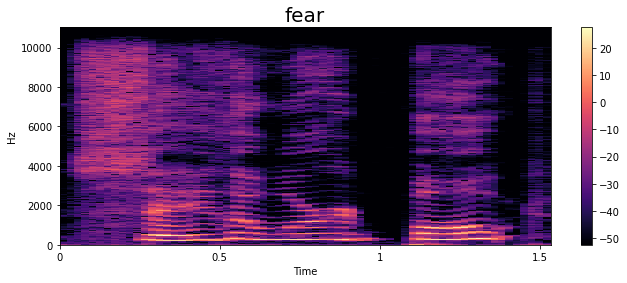

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

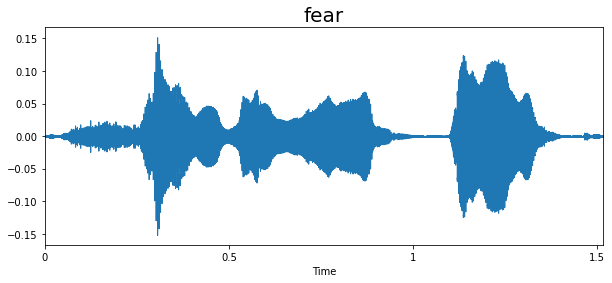

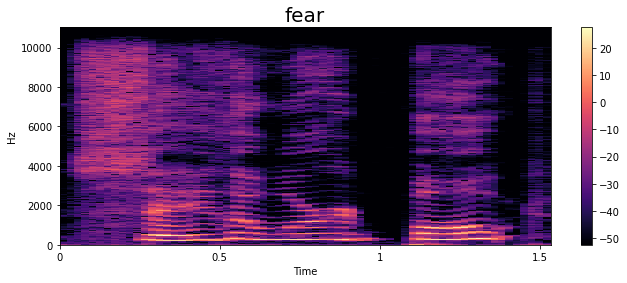

In [ ]:
emotion = 'fear'
path = np.array(Tess_df['Path'][Tess_df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

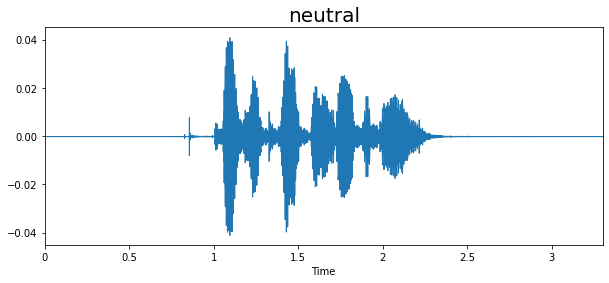

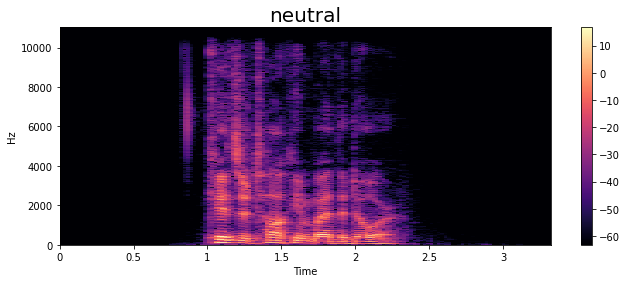

In [ ]:
emotion = 'neutral'
path = np.array(Ravdess_df['Path'][Ravdess_df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
def extract_zcr(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
  return zcr

In [ ]:
def extract_rms(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
  return rms

## Test object


In [ ]:
c = 0
for index in range(len(df['Emotions'])):
    if df['Emotions'][index] == 'neutral':
            print(index)
            if (c == 2): 
              break
            c+= 1

0
3
4


In [ ]:
test1 = extract_mfcc(df['Path'][0])
test1.shape

(40,)

In [ ]:
testPositive1 = extract_mfcc(df['Path'][1])
testNeutral1 = extract_mfcc(df['Path'][0])
testNegative1 = extract_mfcc(df['Path'][16])

testPositive2 = extract_mfcc(df['Path'][2])
testNeutral2 = extract_mfcc(df['Path'][3])
testNegative2 = extract_mfcc(df['Path'][18])

testPositive3 = extract_mfcc(df['Path'][5])
testNeutral3 = extract_mfcc(df['Path'][4])
testNegative3 = extract_mfcc(df['Path'][19])
# print(testPositive ,testNeutral ,testNegative)
# print(testPositive.shape ,testNeutral.shape  ,testNegative.shape )

testPositive1 = np.array([testPositive1])
testNeutral1 = np.array([testNeutral1])
testNegative1 = np.array([testNegative1])

testPositive2 = np.array([testPositive2])
testNeutral2 = np.array([testNeutral2])
testNegative2 = np.array([testNegative2])

testPositive3 = np.array([testPositive3])
testNeutral3 = np.array([testNeutral3])
testNegative3 = np.array([testNegative3])
# print(testPositive.shape ,testNeutral.shape  ,testNegative.shape )

testPositive1 = np.expand_dims(testPositive1, -1)
testNeutral1 = np.expand_dims(testNeutral1, -1)
testNegative1 = np.expand_dims(testNegative1, -1)

testPositive2 = np.expand_dims(testPositive2, -1)
testNeutral2 = np.expand_dims(testNeutral2, -1)
testNegative2 = np.expand_dims(testNegative2, -1)

testPositive3 = np.expand_dims(testPositive3, -1)
testNeutral3 = np.expand_dims(testNeutral3, -1)
testNegative3 = np.expand_dims(testNegative3, -1)
print(testPositive1.shape ,testNeutral1.shape  ,testNegative1.shape )

(1, 40, 1) (1, 40, 1) (1, 40, 1)


In [ ]:
fileObj = open('TestPositive.obj', 'wb')
pickle.dump(testPositive,fileObj)
fileObj.close()
print('saved TestPositive')

fileObj = open('TestNeutral.obj', 'wb')
pickle.dump(testNeutral,fileObj)
fileObj.close()
print('saved TestNeutral')

fileObj = open('TestNegative.obj', 'wb')
pickle.dump(testNegative,fileObj)
fileObj.close()
print('saved TestNegative')

saved TestPositive
saved TestNeutral
saved TestNegative


## Seven Emotions Output

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.0093619e+02,  9.1371315e+01, -9.4499493e+00,  7.8527594e+00,
       -2.0140116e+01,  5.1547289e+00, -7.3803549e+00, -7.2121391e+00,
       -1.2203258e+01,  3.9256814e+00, -1.1861707e+01,  5.9041047e+00,
       -1.2800941e+01,  3.8247337e+00, -6.1562600e+00, -5.1129570e+00,
       -1.3808205e+00,  3.5565990e-01, -2.9249399e+00, -2.4696488e+00,
       -3.0493703e-01, -5.5509195e+00, -3.3801467e+00,  3.3621659e+00,
       -6.0197840e+00,  1.0798624e+00, -3.2699790e+00,  1.5351969e-01,
       -4.0725274e+00,  2.8652396e+00, -9.5641887e-01,  4.2249393e+00,
        1.5176322e+00,  5.5899916e+00,  6.7179503e+00,  7.4201889e+00,
        6.4694886e+00,  5.8576279e+00,  3.1295409e+00,  6.7133322e+00],
      dtype=float32)

In [ ]:
X_mfcc = Tess_df['Path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-400.9362, 91.371315, -9.449949, 7.8527594, -...
1       [-406.46634, 78.00766, -12.059858, 17.346283, ...
2       [-431.6326, 127.572754, 0.49806842, 2.0518894,...
3       [-449.46597, 57.817432, 6.8265033, 53.45698, -...
4       [-411.07306, 108.15043, -23.827116, 10.996486,...
                              ...                        
2795    [-357.41547, 46.30338, -22.997108, 25.783955, ...
2796    [-332.62534, 46.787445, -2.3794298, 11.499007,...
2797    [-342.46555, 33.238255, -5.5321555, 1.1204497,...
2798    [-330.75266, 55.421772, -17.32021, 17.424297, ...
2799    [-308.6167, 46.730453, -28.313013, 13.5942, -1...
Name: Path, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

NameError: ignored

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Tess_df[['Emotions']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## Three Emotions Output


In [ ]:
X3E_mfcc = df['Path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X3E_zcr = df['Path'].apply(lambda x: extract_zcr(x))

In [ ]:
X3E_rms = df['Path'].apply(lambda x: extract_rms(x))

In [ ]:
X3E_mfcc

array([[-6.7139471e+02,  6.6762093e+01, -8.0317360e-01, ...,
        -2.1231229e+00, -4.1300673e+00, -1.8434335e+00],
       [-6.0937897e+02,  7.1820557e+01, -2.8331838e+00, ...,
        -2.8195114e+00, -5.8027620e+00, -2.3245726e+00],
       [-6.1730249e+02,  7.5651642e+01, -7.2583866e+00, ...,
        -7.9277498e-01, -2.5077901e+00, -9.2026907e-01],
       ...,
       [-4.5377551e+02,  1.4683362e+02,  8.3601007e+00, ...,
        -4.6557775e-01, -2.2034016e+00,  1.6145898e+00],
       [-4.1724756e+02,  1.4642613e+02,  3.2651296e+00, ...,
        -5.4784173e-01, -3.3700075e+00, -1.1648233e+00],
       [-4.0268875e+02,  1.4212927e+02,  5.2931499e+00, ...,
         9.6948248e-01,  1.1637403e+00,  1.9126744e+00]], dtype=float32)

In [ ]:
X3E_zcr

array([[0.29490573],
       [0.28358999],
       [0.29950333],
       ...,
       [0.07173978],
       [0.07471079],
       [0.08644104]])

In [ ]:
X3E_rms

0        [0.0026656406]
1         [0.004612843]
2        [0.0049799555]
3        [0.0019477523]
4         [0.002101924]
              ...      
12157     [0.013861723]
12158     [0.010405696]
12159     [0.009781678]
12160     [0.015142285]
12161     [0.020468889]
Name: Path, Length: 12162, dtype: object

In [ ]:
X3E_rms = [x for x in X3E_rms]
X3E_rms = np.array(X3E_rms)
X3E_rms.shape

(12162, 1)

In [ ]:
X3E = [x for x in X3E_mfcc]
X3E = np.array(X3E)
X3E.shape

(12162, 40)

In [ ]:
X3E2 = np.hstack((X3E_rms, X3E_zcr, X3E_mfcc))

In [ ]:
X3E2

array([[ 2.6656406e-03, -6.7139471e+02,  6.6762093e+01, ...,
        -2.1231229e+00, -4.1300673e+00, -1.8434335e+00],
       [ 4.6128430e-03, -6.0937897e+02,  7.1820557e+01, ...,
        -2.8195114e+00, -5.8027620e+00, -2.3245726e+00],
       [ 4.9799555e-03, -6.1730249e+02,  7.5651642e+01, ...,
        -7.9277498e-01, -2.5077901e+00, -9.2026907e-01],
       ...,
       [ 9.7816782e-03, -4.5377551e+02,  1.4683362e+02, ...,
        -4.6557775e-01, -2.2034016e+00,  1.6145898e+00],
       [ 1.5142285e-02, -4.1724756e+02,  1.4642613e+02, ...,
        -5.4784173e-01, -3.3700075e+00, -1.1648233e+00],
       [ 2.0468889e-02, -4.0268875e+02,  1.4212927e+02, ...,
         9.6948248e-01,  1.1637403e+00,  1.9126744e+00]], dtype=float32)

In [ ]:
X3E2.shape

(12162, 42)

In [ ]:
X3E2 = [x for x in X3E2]
X3E2 = np.array(X3E2)
X3E2.shape

(12162, 41)

In [ ]:
import pickle

fileObj = open('X3E_rms_TRCS.obj', 'wb')
pickle.dump(X3E_rms,fileObj)
fileObj.close()

In [ ]:
# MFCC
import pickle

fileObj = open('/content/drive/MyDrive/sensor system/extractedMFCC/X3E_mfcc40_TRCS.obj', 'rb')
X3E_mfcc = pickle.load(fileObj)
fileObj.close()
X3E_mfcc.shape

(12162, 40)

In [ ]:
# ZCR
import pickle

fileObj = open('/content/drive/MyDrive/sensor system/extractedMFCC/X3E_zcr_TRCSE.obj', 'rb')
X3E_zcr = pickle.load(fileObj)
fileObj.close()
X3E_zcr = X3E_zcr[:-1568]
X3E_zcr.shape

(12162, 1)

In [ ]:
# RMS
import pickle

fileObj = open('/content/drive/MyDrive/sensor system/extractedMFCC/X3E_rms_TRCS.obj', 'rb')
X3E_rms = pickle.load(fileObj)
fileObj.close()
X3E_rms.shape

(12162,)

In [ ]:
X3E

array([[[-6.7139471e+02],
        [ 6.6762093e+01],
        [-8.0317360e-01],
        ...,
        [-2.1231229e+00],
        [-4.1300673e+00],
        [-1.8434335e+00]],

       [[-6.0937897e+02],
        [ 7.1820557e+01],
        [-2.8331838e+00],
        ...,
        [-2.8195114e+00],
        [-5.8027620e+00],
        [-2.3245726e+00]],

       [[-6.1730249e+02],
        [ 7.5651642e+01],
        [-7.2583866e+00],
        ...,
        [-7.9277498e-01],
        [-2.5077901e+00],
        [-9.2026907e-01]],

       ...,

       [[-4.5377551e+02],
        [ 1.4683362e+02],
        [ 8.3601007e+00],
        ...,
        [-4.6557775e-01],
        [-2.2034016e+00],
        [ 1.6145898e+00]],

       [[-4.1724756e+02],
        [ 1.4642613e+02],
        [ 3.2651296e+00],
        ...,
        [-5.4784173e-01],
        [-3.3700075e+00],
        [-1.1648233e+00]],

       [[-4.0268875e+02],
        [ 1.4212927e+02],
        [ 5.2931499e+00],
        ...,
        [ 9.6948248e-01],
        [ 1.163

In [ ]:
Features = pd.DataFrame(X3E)
Features

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-671.394714,66.762093,-0.803174,16.397806,7.514785,2.309502,-5.473440,-1.983500,-14.529568,-1.763066,...,-2.734973,-2.177600,-3.423326,-1.972813,-3.967898,-1.697054,-1.329119,-2.123123,-4.130067,-1.843433
1,-609.378967,71.820557,-2.833184,23.965897,-0.047450,1.916684,-5.993073,-6.594219,-19.163977,-3.303874,...,-4.416219,-2.165684,-4.039298,-3.240991,-5.007332,-1.977767,-3.117224,-2.819511,-5.802762,-2.324573
2,-617.302490,75.651642,-7.258387,16.214632,2.896186,-2.209889,-8.617944,-6.603786,-15.430138,-1.625239,...,-3.888173,-2.767449,-3.450800,-4.046142,-5.232162,-2.573699,-3.093327,-0.792775,-2.507790,-0.920269
3,-695.903625,74.406235,1.236440,18.969513,7.234983,3.659448,-5.945938,-3.024656,-13.505458,-4.219079,...,-2.992411,-0.981951,-2.654294,-2.573635,-2.317900,-0.350576,-2.214699,-1.990630,-4.615123,-3.252334
4,-677.353821,82.146141,0.626563,15.173973,9.720119,3.021678,-7.169266,-3.918698,-11.738581,-4.026483,...,-4.465944,-2.448714,-4.313847,-3.926816,-4.633713,-1.359371,-2.550025,-3.710285,-5.073056,-4.956296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,-430.210876,149.512207,5.506391,42.290466,-17.816290,31.960552,-11.826086,3.227571,-6.125701,4.441388,...,3.187101,-1.503299,4.077332,-1.629842,-0.483239,-0.240145,2.563983,0.939478,-2.649266,-2.449200
12158,-459.413696,135.161545,11.521754,46.429554,-5.233515,36.678509,-5.873002,3.628260,-0.242884,2.564070,...,4.079268,0.696693,6.975518,3.274602,4.062128,1.026739,-0.342253,-2.020930,-4.599145,-1.477033
12159,-453.775513,146.833618,8.360101,45.129692,-16.314789,33.328396,-6.856719,8.038729,-2.705558,2.832132,...,2.548492,-5.474459,1.216737,-0.799261,1.786239,-0.632253,0.516182,-0.465578,-2.203402,1.614590
12160,-417.247559,146.426132,3.265130,43.001671,-13.050303,31.204504,-14.510942,3.858494,-4.920281,0.852483,...,0.455530,-4.557482,3.047263,-2.874627,0.883992,-1.776032,-1.014901,-0.547842,-3.370008,-1.164823


In [ ]:
exampleObj = np.expand_dims(exampleObj, -1)
exampleObj.shape

(12162, 40, 1)

In [ ]:
X3E = X3E_mfcc

In [ ]:
## input split
X3E = np.expand_dims(X3E, -1)
X3E.shape

(12162, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y3E = enc.fit_transform(df[['Emotions']])

In [ ]:
y3E = y3E.toarray()

In [ ]:
y3E.shape

(12162, 3)

In [ ]:
y3E

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
y3E = [0] * 12162

### For train / test split approach

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X3E2, y3E, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 42), (9121, 3), (3041, 42), (3041, 3))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

ValueError: ignored

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 40, 1), (2100, 3), (700, 40, 1), (700, 3))

# Create the LSTM Model

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from tensorflow import keras

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from livelossplot import PlotLossesKeras

## Seven Emotions


In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 22ms/step - loss: 1.1095 - accuracy: 0.5844 - val_loss: 2.2405 - val_accuracy: 0.4125
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.4319 - accuracy: 0.8580 - val_loss: 1.8183 - val_accuracy: 0.5143
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.2230 - accuracy: 0.9286 - val_loss: 1.7158 - val_accuracy: 0.6250
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.9446 - val_loss: 2.0784 - val_accuracy: 0.5571
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1181 - accuracy: 0.9665 - val_loss: 2.6282 - val_accuracy: 0.5250
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1267 - accuracy: 0.9656 - val_loss: 3.5777 - val_accuracy: 0.2375
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1086 - accuracy: 0.9661 - val_loss: 2.4895 - val_accuracy: 0.4768
Epoch 8/50
35/35 [=

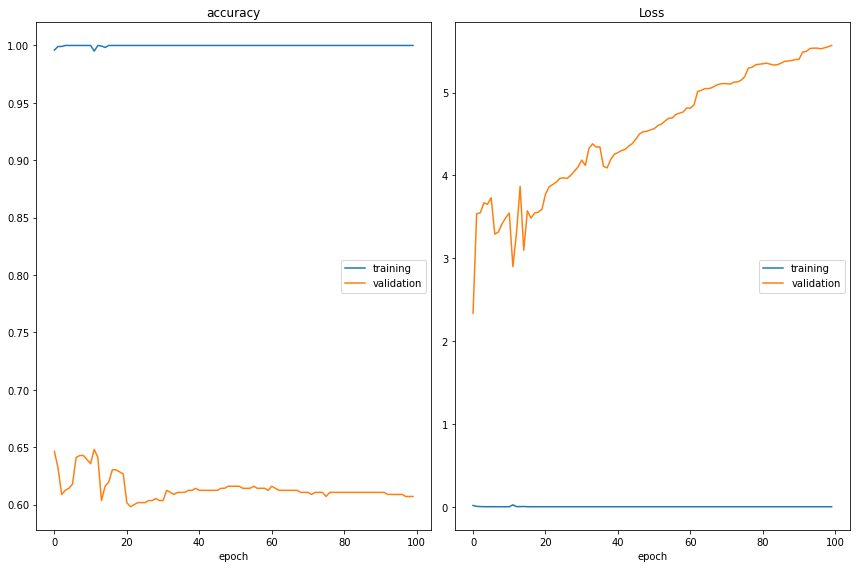

accuracy
	training         	 (min:    0.995, max:    1.000, cur:    1.000)
	validation       	 (min:    0.598, max:    0.648, cur:    0.607)
Loss
	training         	 (min:    0.000, max:    0.023, cur:    0.000)
	validation       	 (min:    2.337, max:    5.569, cur:    5.569)
70/70 [==============================] - 1s 18ms/step - loss: 1.1963e-06 - accuracy: 1.0000 - val_loss: 5.5691 - val_accuracy: 0.6071


In [ ]:
es_callback = [PlotLossesKeras()]

model.fit(X, y, validation_split=0.2, epochs=100, callbacks=[es_callback])

## Three Emotions

In [ ]:
model3E = Sequential([
    LSTM(256, return_sequences=False, input_shape=(42,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model3E.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3E.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                

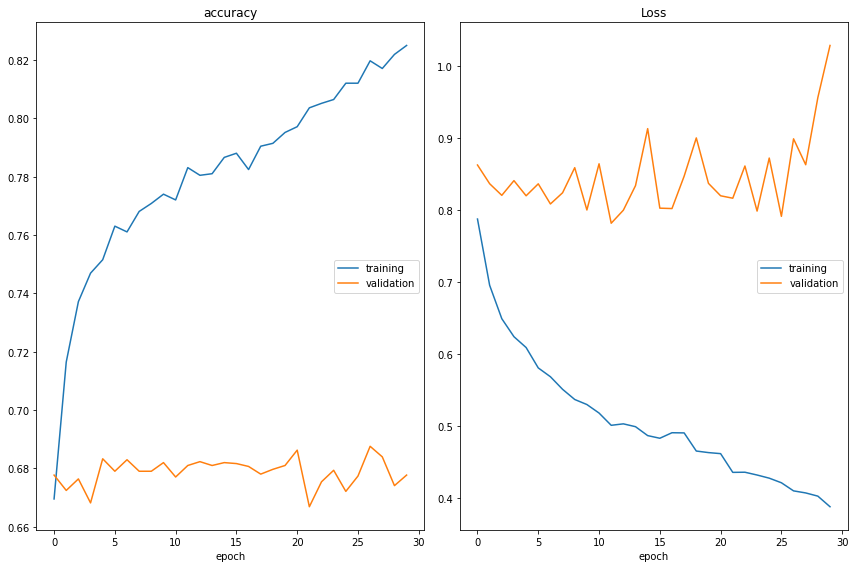

accuracy
	training         	 (min:    0.670, max:    0.825, cur:    0.825)
	validation       	 (min:    0.667, max:    0.688, cur:    0.678)
Loss
	training         	 (min:    0.388, max:    0.787, cur:    0.388)
	validation       	 (min:    0.781, max:    1.028, cur:    1.028)
381/381 [==============================] - 20s 53ms/step - loss: 0.5284 - accuracy: 0.8000
Accuracy of our model on test data :  80.0032913684845 %


In [ ]:
# ===================== Train the model =====================
# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# history3E=model3E.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test), callbacks=[rlrp])

# history3E = model3E.fit(X3E, y3E, validation_split=0.2, epochs=10, batch_size=32)

es_callback = [PlotLossesKeras()]
history3E = model3E.fit(X3E2, y3E, validation_split=0.25, epochs=30, callbacks=[es_callback])

# exampleObj
# es_callback = [PlotLossesKeras()]
# history3E = model3E.fit(exampleObj, y3E, validation_split=0.25, epochs=30, callbacks=[es_callback])

# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# history3E=model3ECNN.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model3E.evaluate(X3E2,y3E)[1]*100 , "%")

# print("Accuracy of our model on test data : " , model3ECNN.evaluate(X3E,y3E)[1]*100 , "%")

In [ ]:
print("Accuracy of our model on test data : " , model3E.evaluate(X3E2,y3E)[1]*100 , "%")

381/381 [==============================] - 19s 50ms/step - loss: 0.4856 - accuracy: 0.8003
Accuracy of our model on test data :  80.02795577049255 %


In [ ]:
model3ECNN=Sequential()
model3ECNN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model3ECNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model3ECNN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model3ECNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model3ECNN.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model3ECNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model3ECNN.add(Dropout(0.2))

model3ECNN.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model3ECNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model3ECNN.add(Flatten())
model3ECNN.add(Dense(units=32, activation='relu'))
model3ECNN.add(Dropout(0.3))

model3ECNN.add(Dense(units=3, activation='softmax'))
model3ECNN.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model3ECNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history3E=model3ECNN.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model3ECNN.evaluate(X3E,y3E)[1]*100 , "%")

Epoch 1/30
143/143 [==============================] - 48s 317ms/step - loss: 1.2939 - accuracy: 0.5896 - val_loss: 0.9453 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 2/30
143/143 [==============================] - 41s 290ms/step - loss: 0.9578 - accuracy: 0.6134 - val_loss: 0.8956 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 3/30
143/143 [==============================] - 28s 197ms/step - loss: 0.8903 - accuracy: 0.6318 - val_loss: 0.8323 - val_accuracy: 0.6396 - lr: 0.0010
Epoch 4/30
143/143 [==============================] - 28s 195ms/step - loss: 0.8610 - accuracy: 0.6370 - val_loss: 0.8271 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 5/30
143/143 [==============================] - 28s 195ms/step - loss: 0.8036 - accuracy: 0.6601 - val_loss: 0.7646 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 6/30
143/143 [==============================] - 27s 191ms/step - loss: 0.7519 - accuracy: 0.6858 - val_loss: 0.6892 - val_accuracy: 0.6991 - lr: 0.0010
Epoch 7/30
143/143 [==============================] 

## random forest, decision tree, SVM


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm.fit(x_train, y_train)

ValueError: ignored

In [ ]:
model3E.save('/content/drive/MyDrive/sensor system/savedModels/model3E_mfcc40_rms_zcr_TRCS.h5')

In [ ]:
modelLoad = keras.models.load_model('/content/drive/MyDrive/sensor system/savedModels/model3E_mfcc40_rms_zcr_TRCS.h5')

In [ ]:
loss, acc = modelLoad.evaluate(X3E, y3E, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(modelLoad.predict(X3E).shape)

381/381 - 17s - loss: 0.4703 - accuracy: 0.8028 - 17s/epoch - 44ms/step
Restored model, accuracy: 80.28%
381/381 [==============================] - 20s 51ms/step
(12162, 3)


### confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix

# predicted = model3ECNN.predict(x_test)
# predicted = modelLoad.predict(x_test)
# predicted = model3E.predict(x_test)
# predicted = model.predict(x_test)
predicted = dt.predict(x_test)
predicted_classes = np.argmax(predicted, axis=1)
actual_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(actual_classes, predicted_classes)

FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]
TP = cm[1,1]

FPR = FP / (FP + TN)
FNR = FN / (TP + FN)

print("False positive rate:", FPR)
print("False negative rate:", FNR)

ValueError: ignored

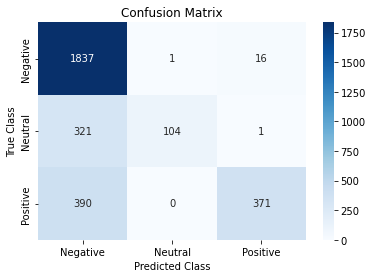

In [ ]:
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Negative', 'Neutral','Positive'], 
            yticklabels=['Negative', 'Neutral','Positive'], 
            annot_kws={"ha": 'center', "va": 'center'})

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

96/96 [==============================] - 5s 48ms/step
False positive rate: 0.401010951979781
False negative rate: 0.06256742179072276


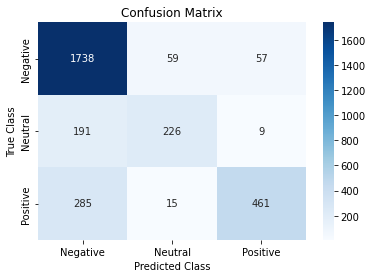

In [ ]:
# Make predictions on test set
# y_pred = model3ECNN.predict(x_test)
y_pred = modelLoad.predict(x_test)
# y_pred = model3E.predict(x_test)
# y_pred = model.predict(x_test)
# y_pred = dt.predict(x_test)

# Convert predicted outputs and true labels into binary vectors
y_pred_binary = np.zeros_like(y_pred)
y_pred_binary[np.arange(len(y_pred)), y_pred.argmax(1)] = 1

y_true_binary = np.zeros_like(y_test)
y_true_binary[np.arange(len(y_test)), y_test.argmax(1)] = 1

# Compute confusion matrix for output A (assuming A is positive class)
conf_mat = confusion_matrix(y_true_binary[:,0], y_pred_binary[:,0])

# Compute FPR and FNR
FPR = conf_mat[0,1] / np.sum(conf_mat[0,:])
FNR = conf_mat[1,0] / np.sum(conf_mat[1,:])

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
# print("accuracy:", accuracy_score(y_test, y_pred))

print("False positive rate:", FPR)
print("False negative rate:", FNR)

predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(actual_classes, predicted_classes)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Negative', 'Neutral','Positive'], 
            yticklabels=['Negative', 'Neutral','Positive'], 
            annot_kws={"ha": 'center', "va": 'center'})

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

# Plot Result

## Seven Emotions

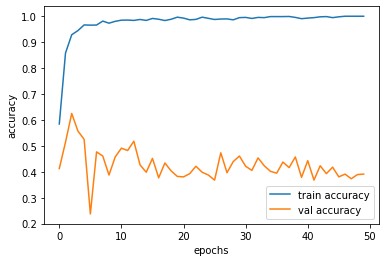

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

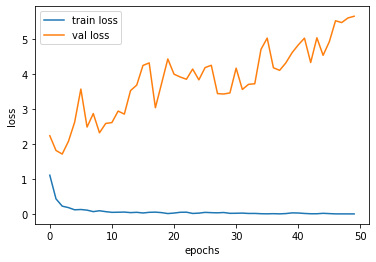

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Three Emotions


In [ ]:
print("Accuracy of our model on test data : " , model3E.evaluate(X3E,y3E)[1]*100 , "%")


341/341 [==============================] - 11s 31ms/step - loss: 0.5590 - accuracy: 0.7704
Accuracy of our model on test data :  77.04166173934937 %


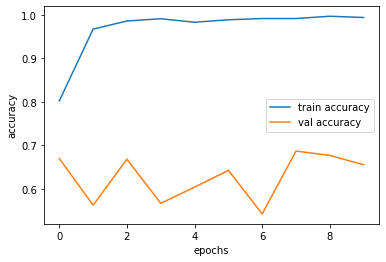

In [ ]:
epochs = list(range(10))
acc = history3E.history['accuracy']
val_acc = history3E.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

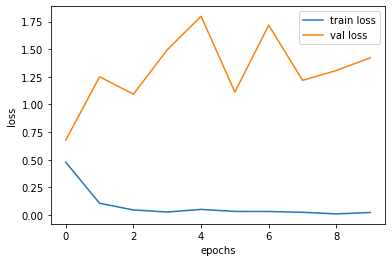

In [ ]:
loss = history3E.history['loss']
val_loss = history3E.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Predictions

In [ ]:
Categories = ['negative', 'neutral', 'positive']

modelPred = tf.keras.models.load_model('/content/drive/MyDrive/sensor system/savedModels/model3E_mfcc40_TRCS.h5')

In [ ]:
prediction = modelPred.predict([testNeutral1])
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.04941108 0.9481819  0.00240699]]


In [ ]:
count = 0
one = 0
two = 0
three = 0

for i in range(len(df['Emotions'])):
  if df['Emotions'][i] == 'negative':
    data = extract_mfcc(df['Path'][i])
    data = np.array([data])
    data = np.expand_dims(data, -1)
    prediction = modelPred.predict([data])
    # print(np.argmax(prediction[0]))
    if (np.argmax(prediction[0]) == 0): one += 1 
    if (np.argmax(prediction[0]) == 1): two += 1 
    if (np.argmax(prediction[0]) == 2): three += 1 
    count += 1
    if (count == 20):
      break

print('one: ', one)
print('two: ', two)
print('three: ', three)

1/1 [==============================] - 0s 49ms/step
one:  16
two:  2
three:  2
